In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
dataset = pd.read_csv("/content/drive/My Drive/IIITNR_PROJECT/finaldata.csv")

In [6]:
dataset

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,17.264660,18.335979,18.548411,18.490954,0.255284,0.133024,0.117905,0.124992,0.054669,0.055324,...,536.499317,0.000310,0.000311,0.000307,0.000312,0.017609,0.017645,0.017518,0.017653,Black Soil
1,38.364171,35.796811,35.933866,39.438942,0.005557,0.121143,0.123396,-0.038545,0.026750,0.028742,...,2414.397388,0.000110,0.000115,0.000113,0.000112,0.010466,0.010707,0.010631,0.010587,Black Soil
2,26.561111,26.534577,27.667824,27.608610,0.141612,0.142929,0.083427,0.080971,0.038653,0.037527,...,1194.448904,0.000166,0.000168,0.000162,0.000166,0.012877,0.012975,0.012721,0.012872,Black Soil
3,12.077756,12.146298,12.335615,12.084356,0.185825,0.127701,0.133605,0.148248,0.086285,0.093907,...,283.144810,0.000908,0.000919,0.000914,0.000914,0.030137,0.030307,0.030239,0.030238,Black Soil
4,9.272283,9.385549,9.434222,9.434664,0.112793,0.086340,0.068770,0.076451,0.104570,0.098324,...,142.388612,0.001156,0.001169,0.001158,0.001159,0.033998,0.034186,0.034026,0.034046,Black Soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,37.852319,37.496454,37.995849,38.221631,0.024357,0.035430,0.017792,0.016993,0.028417,0.027980,...,2373.899291,0.000166,0.000169,0.000166,0.000166,0.012868,0.013000,0.012891,0.012901,Alluvial soil
1553,34.720000,34.714744,42.830303,45.211538,0.216822,0.241323,-0.073231,-0.145564,0.035693,0.030901,...,2814.878205,0.001353,0.001721,0.001598,0.001685,0.036785,0.041481,0.039972,0.041046,Alluvial soil
1554,30.160684,38.457792,34.868132,37.132035,0.588977,0.457203,0.523287,0.433832,0.093449,0.042744,...,2474.965368,0.000985,0.000736,0.000662,0.000677,0.031392,0.027132,0.025736,0.026019,Alluvial soil
1555,35.360000,35.391026,42.203030,45.983974,0.193665,0.240561,-0.017857,-0.175304,0.027499,0.020426,...,2930.259615,0.001328,0.001700,0.001593,0.001705,0.036443,0.041233,0.039915,0.041295,Alluvial soil


In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [8]:
x = dataset.drop(columns=['label'], axis=1)
y = dataset['label']

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

In [12]:
# Train the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = dtree.predict(X_test)

In [14]:
# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [15]:

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[158   7   7   6]
 [  7  99   3   5]
 [  1   0  68   3]
 [  4   6   0  94]]

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.93      0.89      0.91       178
   Black Soil       0.88      0.87      0.88       114
    Clay soil       0.87      0.94      0.91        72
     Red soil       0.87      0.90      0.89       104

     accuracy                           0.90       468
    macro avg       0.89      0.90      0.89       468
 weighted avg       0.90      0.90      0.90       468



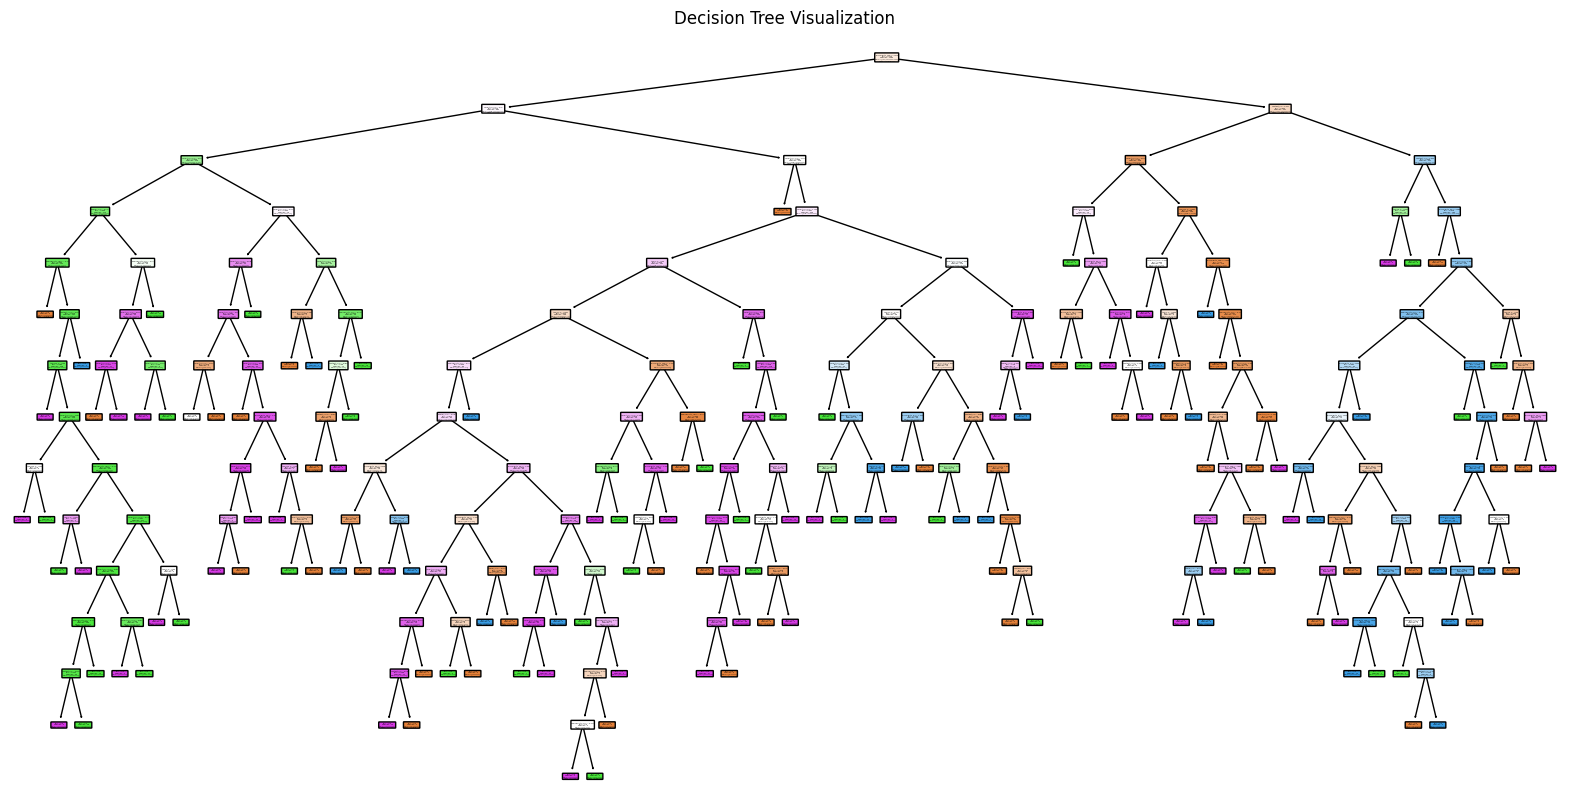

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=x.columns, class_names=['Alluvial soil', 'Black Soil' , 'Clay soil' , 'Red soil'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [17]:
dtree2 = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

In [18]:
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [19]:
y_pred2 = dtree2.predict(X_test)

In [20]:
# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

In [21]:
# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[96  2 11 69]
 [10 76  4 24]
 [29  2 35  6]
 [17 12  4 71]]

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.63      0.54      0.58       178
   Black Soil       0.83      0.67      0.74       114
    Clay soil       0.65      0.49      0.56        72
     Red soil       0.42      0.68      0.52       104

     accuracy                           0.59       468
    macro avg       0.63      0.59      0.60       468
 weighted avg       0.63      0.59      0.60       468



In [22]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [23]:
from sklearn.model_selection import  GridSearchCV

In [24]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [25]:
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [27]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [28]:
# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

In [29]:
# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[159   5   8   6]
 [  5  97   5   7]
 [  1   1  67   3]
 [  2   2   0 100]]

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.95      0.89      0.92       178
   Black Soil       0.92      0.85      0.89       114
    Clay soil       0.84      0.93      0.88        72
     Red soil       0.86      0.96      0.91       104

     accuracy                           0.90       468
    macro avg       0.89      0.91      0.90       468
 weighted avg       0.91      0.90      0.90       468



CROSSS VALIDATION

In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [31]:
# Define the range of max_depth values to evaluate
max_depth_range = [None, 5, 10, 15, 20, 25, 30]

In [32]:
# Initialize lists to store the results
mean_scores = []


In [33]:
# Perform cross-validation for each value of max_depth
for max_depth in max_depth_range:
    dtree3 = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dtree3, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

In [34]:
# Print the results
for depth, score in zip(max_depth_range, mean_scores):
    print(f"Max Depth: {depth}, Cross-Validation Accuracy: {score:.4f}")

Max Depth: None, Cross-Validation Accuracy: 0.8751
Max Depth: 5, Cross-Validation Accuracy: 0.6933
Max Depth: 10, Cross-Validation Accuracy: 0.8494
Max Depth: 15, Cross-Validation Accuracy: 0.8779
Max Depth: 20, Cross-Validation Accuracy: 0.8751
Max Depth: 25, Cross-Validation Accuracy: 0.8751
Max Depth: 30, Cross-Validation Accuracy: 0.8751


In [35]:
# Find the max_depth with the highest mean cross-validation score
best_max_depth = max_depth_range[np.argmax(mean_scores)]
print(f"Best max_depth: {best_max_depth}")

Best max_depth: 15


FEATUERE SELECTION

In [36]:
from sklearn.feature_selection import RFE

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
# Initialize RFE with the model and the desired number of features
rfe = RFE(model, n_features_to_select=10)

In [39]:
# Fit RFE
rfe.fit(x, y)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=10)

In [40]:
# Get the selected features
selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['dissimilarity_0', 'dissimilarity_135', 'correlation_0',
       'correlation_45', 'correlation_90', 'correlation_135',
       'homogeneity_135', 'contrast_0', 'contrast_45', 'ASM_45'],
      dtype='object')
